# Lab | Avila Bible 
In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Read the README.md file,
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

%matplotlib inline

![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

## What am I expected to do?
Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Perform a minimum of 4 Feature Extraction and Engineering techniques
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

Just one last piece of advice, take a moment to explore the data, remember this dataset contains two files: **train** and **test**. You will find both files in `data` folder. The **test** files contains the data you will predict for, therefore it does not include the labels.
Use the **train** dataset as you wish, but don't forget to split it into **train** and **test** again so you can evaluate your models. Just be sure to train it again with the whole data before predicting.
We have also included a **sample submission** which is of the exact shape and format you must use when evaluating your predictions against the groundtruth through the `APIla-bible`. It won't work unless it is the exact same shape. 



#### Train dataset
Data column meaning:
* col 0: intercolumnar distance
* col 1: upper margin
* col 2: lower margin
* col 3: exploitation
* col 4: row number
* col 5: modular ratio
* col 6: interlinear spacing
* col 7: weight
* col 8: peak number
* col 9: modular ratio/ interlinear spacing 
* col 10: Author

In [2]:
train_dataset = pd.read_csv('../data/training_dataset.csv', index_col=0)
#train_dataset.head()

#### Test dataset


In [69]:
test_dataset = pd.read_csv('../data/test_dataset.csv', index_col=0)
#test_dataset.head()
test_dataset.shape

(8012, 10)

#### Sample submission

In [71]:
sample_submission = pd.read_csv('../data/sample_submission.csv', header=None, index_col=0)
sample_submission.head()
#sample_submission.shape

,1
0,
0,Philippus
1,Ubuntius
2,Esequlius
3,Coronavirucus
4,Philippus


`Keep calm and code on!`
# Challenge - train your models, make the best prediction

### 1. Estudiamos el dataset

In [45]:
# TAKE A LOOK AT THE DATASET
train_dataset.shape # 12017 rows, 11 columns
train_dataset.isnull().sum() # No null values
train_dataset.dtypes # Columns 0 to 9 are float64. Column 10 (authors) id object

# As the labels are floats, we can calculate some statistical data:
train_dataset.describe() # We can notice several outliers as maximums are very high

,0,1,2,3,4,5,6,7,8,9
count,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000
mean,0.021280,0.030684,-0.000379,-0.022127,0.006801,-0.001279,0.032540,-0.006720,-0.011368,-0.026942
std,1.004481,3.661030,1.072319,1.002045,0.963679,1.108192,1.245215,1.012995,1.085821,0.985799
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.164819,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.542563,0.172340,-0.598658,-0.006326,-0.555747,-0.372457,-0.528135
50%,0.056229,-0.055704,0.214288,0.080127,0.261718,-0.058835,0.220177,0.101115,0.064084,-0.053548
75%,0.216699,0.203385,0.349432,0.601905,0.261718,0.522513,0.446679,0.646377,0.500624,0.491862
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,11.911338


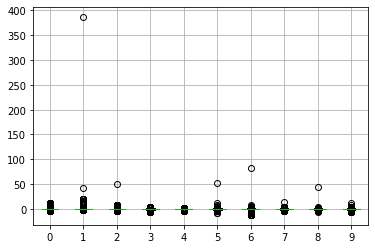

In [47]:
# Let's check if there the outliers
train_dataset.boxplot( ); # Yes! There are a few!

### 2. Modelado del dataset original
Aunque haya outliers, empezaremos modelando el dataset original.

Se trata de un problema de **clasificación multiple** puesto que las variables a predecir son de tipo categórico. Podríamos aplicar cualquiera de los modelos de clasificación multilabel del siguiente enlace:

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

Multiclass classification: classification task with more than two classes.

Aplicaremos:
* **Support Vector Classification (SVC)**: Modela varios hiperplanos que separan los grupos. De los hiperplanos posibles, escoge el que esté a mayor distancia (margen) de cada grupo de datos. La clase del punto que queramos predecir será la clase del lado del hiperplano en el que esté.
* **K Nearest neighbours**: Dado un punto, toma los k vecinos más cercanos, si la mayoría de esos vecinos pertenecen a una clase, el punto será de esa clase.
* **Gaussian Naïve-Bayes**: Dado un punto, calculamos la probabilidad de que pertenezca a cada clase y nos quedamos con el resultado que emita mayor probabilidad.
* **Random forests**: Se crea un árbol principal, y de él parten diversas ramas con cada una de los valores que puede tomar el árbol "padre".
* **Gradient Boosting**: Technique for improving Decision Trees.
* **Ada Boost**: Hace árboles de decisión basándose en los errores del árbol previo?

Con los datos en crudo, vemos qué precisión obtendríamos con estos modelos.

Primero dividimos el *train_dataset* en datos de entrenamiento y datos de test:

In [6]:
X = train_dataset[train_dataset.columns[0:-1]] # features
y = train_dataset[train_dataset.columns[-1]] # labels: Marcus, Philippus,...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
# Definición de modelos clasificadores
models = {
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "GNB": GaussianNB(),
    "RF": RandomForestClassifier(n_estimators = 200),#max_depth=2, random_state=0),
    "GBC": GradientBoostingClassifier(),
    "ABC": AdaBoostClassifier(n_estimators=100, random_state=0)
}

In [60]:
# Train models
for model, clf in models.items():
    print(f"Training {model}")
    clf.fit(X_train, y_train) # train the model
    
print("Train completed")

Training SVC
Training KNN
Training GNB
Training RF
Training GBC
Training ABC
Train completed


Para saber la precisión del clasficador, tenemos que utilizar métricas de clasificación multiclase (multilabel classification metrics): accuracy_score.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

--> auc, precision_score, recall_score y f1_score son para clasificación binomial.

In [61]:
# Predict variables and calculate metrics
printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

acc_dict ={}

for model, clf in models.items():
    #print(clf)
    y_pred = clf.predict(X_test) # train the model
    
    # Calculate metrics
    #print(f"Evaluating model {model}")
    accuracy = accuracy_score(y_test, y_pred)
    #printMetric("Accuracy", accuracy) # Precisión de acierto

    # Save results
    acc_dict[model] = round(accuracy,3)

In [62]:
acc_dict = sorted(acc_dict.items(), key= lambda x: -x[1])
acc_dict

[('RF', 0.985),
 ('GBC', 0.937),
 ('KNN', 0.74),
 ('SVC', 0.733),
 ('ABC', 0.505),
 ('GNB', 0.355)]

Parece que los que mejor funcionan son el Gradient Boosting Classifier, el K-neighbours y el SVC.
### 3. Data cleaning
Limpiamos la base de datos para mejorar las precisiones de los modelos anteriores.

In [63]:
# IDENTIFICATION OF OUTLIERS

# A point is an outlier if it's greater than 1.5 times the 3rd quartile or 1.5 times less than the 1st 
# quartile.

# To identify the outliers, we'll calculate the IQR for the entire dataframe
Q1 = train_dataset.quantile(0.25)
Q3 = train_dataset.quantile(0.75)
IQR = Q3 - Q1

# Select the rows where all values are within the IQR
df_clean=train_dataset[~((train_dataset < (Q1 - 1.5 * IQR)) | (train_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
print (df_clean.shape) # I've removed around 5000 rows! --> Try with zscore??
df_clean = df_clean.reset_index()
df_clean.drop(columns = "index", inplace = True)
df_clean.head()

(7107, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,0.056229,0.187683,-0.031104,-0.958476,0.261718,-0.598658,0.861934,-0.885246,-0.528364,-0.848946,Clarius
4,0.080916,0.438921,0.143160,-0.523288,0.261718,-0.598658,0.106925,-0.641641,0.188810,-0.491704,Ubuntius


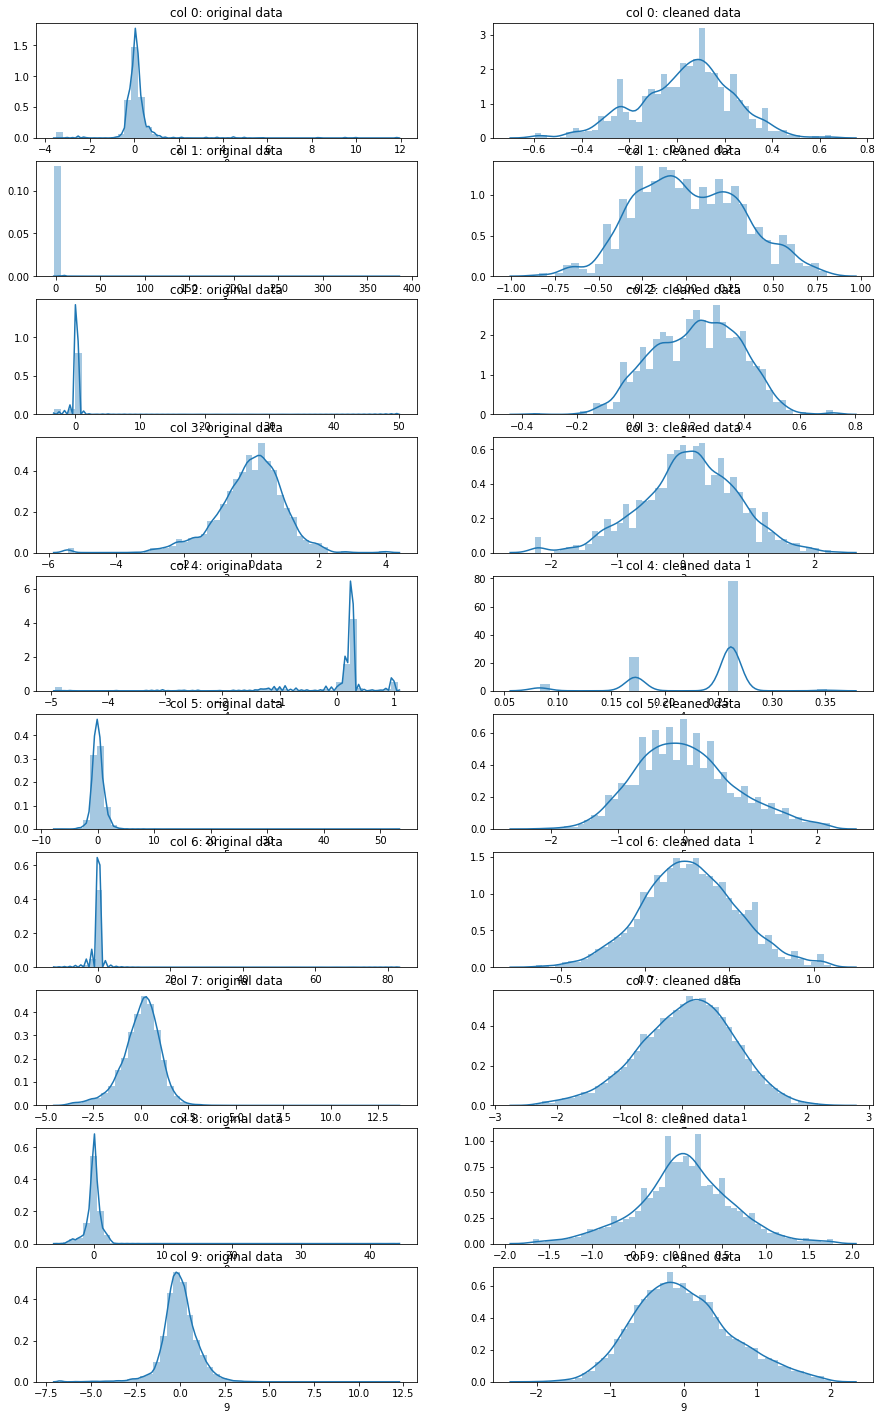

In [51]:
# DISTRIBUTION
fig, sub = plt.subplots(10, 2, figsize = (15,25))
for i in range(10):
    sns.distplot(train_dataset[str(i)], ax = sub [i,0]).set_title(f"col {str(i)}: original data")
    sns.distplot(df_clean[str(i)], ax = sub [i,1]).set_title(f"col {str(i)}: cleaned data")
    
# Conclusion: 
# - Most of them follow a normal distribution
# - Col 4 is binomial?

### 4. Clean data modeling
Aplicamos los modelos de la sección 2 al df_clean.

In [64]:
X_clean = df_clean[df_clean.columns[0:-1]] # features
y_clean = df_clean[df_clean.columns[-1]] # labels: Marcus, Philippus,...

X_clean_train, X_clean_test, y_clean_train, y_clean_test = train_test_split(X_clean, y_clean, test_size=0.2)

In [65]:
# Train models
for model, clf in models.items():
    print(f"Training {model}")
    clf.fit(X_clean_train, y_clean_train) # train the model
    
print("Train completed")

Training SVC
Training KNN
Training GNB
Training RF
Training GBC
Training ABC
Train completed


In [66]:
# Predict variables and calculate metrics
printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

acc_clean_dict ={}

for model, clf in models.items():
    #print(clf)
    y_clean_pred = clf.predict(X_clean_test) # train the model
    
    # Calculate metrics
    #print(f"Evaluating model {model}")
    accuracy = accuracy_score(y_clean_test, y_clean_pred)
    #printMetric("Accuracy", accuracy) # Precisión de acierto

    # Save results
    acc_clean_dict[model] = round(accuracy,3)

In [67]:
acc_clean_dict = sorted(acc_clean_dict.items(), key= lambda x: -x[1])
acc_clean_dict

[('RF', 0.98),
 ('GBC', 0.956),
 ('SVC', 0.722),
 ('KNN', 0.691),
 ('GNB', 0.641),
 ('ABC', 0.302)]

### 5. test_dataset training
Hemos conseguido mejores resultados con el RF de los datos crudos, de modo que entrenaremos el *test_dataset* con los datos en crudo.

In [90]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train) # train the model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [91]:
y_pred = clf.predict(test_dataset)
ypred_df = pd.DataFrame({"y_pred": y_pred})

## What do I do once I have a prediction?
Once you have already trained your model and made a prediction with it, you are ready to check what is the accuracy of it. 

Save your prediction as a `.csv` file.

In [92]:
ypred_df.to_csv(r'../data/y_pred.csv', header = None)#, index = False)

Now you are ready to know the truth! Are you good enough to call yourself a pro?

Lucky you have the ultimate **APIla-bible** which give you the chance of checking the accuracy of your predictions as many times as you need in order to become the pro you want to be. 
## How do I post my prediction to the APIla-bible?
Easy peasy! You should only fulfil the path to your prediction `.csv` and run the cell below! 

In [93]:
#my_submission = "../data/sample_submission.csv"
my_submission = "../data/y_pred.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

{'accuracy': 0.9395906140788817,
 'quote': "Great job! That's an impressive score. Will you give it an extra push? Almost at the top, care for a final `boost`?"}

**Conclusiones**:
* Para el RF se consigue una accuracy de 0.989, que aunque parece un resultado muy bueno puede deberse a overfitting.
* Para el GradientBoostingClassifier() con los datos en crudo (incluyendo outliers) obtenemos una precisión del 94%.

![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)